In [1]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import pandas as pd
from scipy.ndimage.measurements import label

In [4]:
file = '/users/global/cornkle/shared/MCSfiles/NFLICS_blobs/blobMap_-40-25000_JJAS_-50-points_dominant_2005.nc' 

In [5]:
# this data is on a 5km grid
tir_ds = xr.open_dataset(file)

In [6]:
pick_time = pd.to_datetime('2005-06-03_17', format='%Y-%m-%d_%H')
tir_ds = tir_ds['tir'].sel(time=pick_time)

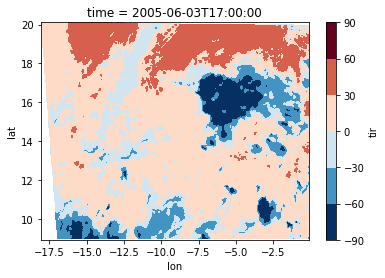

In [7]:
tir_ds.plot.contourf()

In [8]:
tir_data = tir_ds.values

In [9]:
# pick t threshold, mask background with 0
tir_data[(tir_data>-40) | np.isnan(tir_data)] = 0

/home/ck/miniconda3/lib/python3.5/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in greater
  


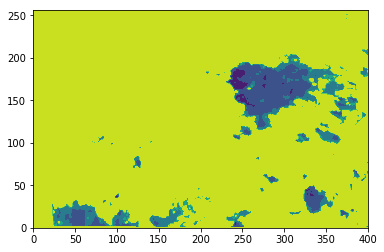

In [10]:
plt.contourf(tir_data)

In [11]:
# label assigns an index to contiguous non-zero areas 
labels, numL = label(tir_data)

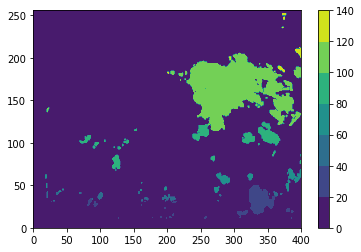

In [12]:
plt.contourf(labels)
plt.colorbar()

In [13]:
#  u - unique values, inv - flattened label array
u, inv = np.unique(labels, return_inverse=True)

In [14]:
# counts the number of occurence of every non-zero entry
n = np.bincount(inv)

In [15]:
# choose an area threshold e.g. 200 pixel and mask out bad indices or loop through good ones..
badinds = u[(n < 200)]  
goodinds = u[(n >= 200)]

In [16]:
# mask out loop
for bad in badinds:
    tir_data[labels==bad] = 0

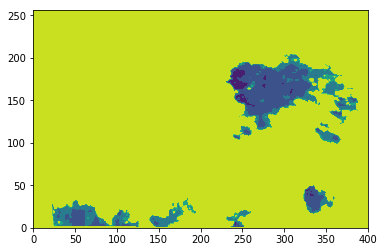

In [17]:
# <5000km2 clouds masked out:
plt.contourf(tir_data)